# Exercise 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 7.2

The results of the calculation of the autocorrelation function with a maximum time lag of 200 time steps computed with autocorr.x are plotted for the three different systems for a simulation $5\cdot 10^5$ steps long is shown in the graph below

Text(0.5, 0, '$\\tau$')

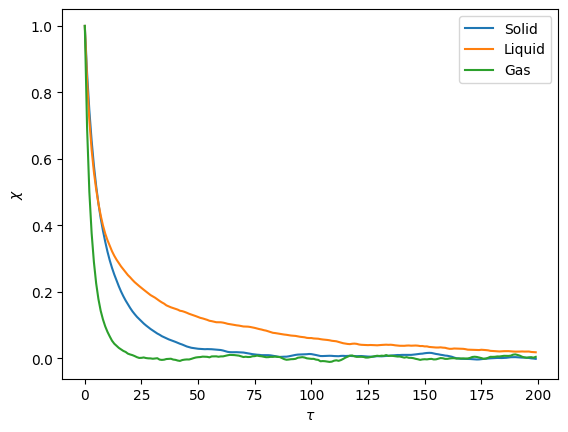

In [9]:
chi_s = np.loadtxt("autsolid.dat", unpack = True)
chi_l = np.loadtxt("autliquid.dat", unpack = True)
chi_g = np.loadtxt("autgas.dat", unpack = True)
tau = np.arange(0, 200, 1)
plt.plot(tau, chi_s, label = "Solid")
plt.plot(tau, chi_l, label = "Liquid")
plt.plot(tau, chi_g, label = "Gas")
plt.legend()
plt.ylabel(r"$\chi$")
plt.xlabel(r"$\tau$")

In [47]:
def err_v_blk(x,L):
    block = x[0:L-1:1]
    avg2= np.var(block)
    avg = np.sqrt(s2)
    return avg

We then load the potential data from the three simulations 

In [48]:
step, U_s, U_p_s, err_U_s = np.loadtxt("./BlockingTest/potential_s.dat", unpack=True)
step, U_l, U_p_l, err_U_l = np.loadtxt("./BlockingTest/potential_l.dat", unpack=True)
step, U_g, U_p_g, err_U_g = np.loadtxt("./BlockingTest/potential_g.dat", unpack=True)

At a glance the three potential energies have the following evolution, here and in the following analysis the first 1000 steps are discarded to remove initial steps that lead to equilibration

Text(0, 0.5, '$U^*$')

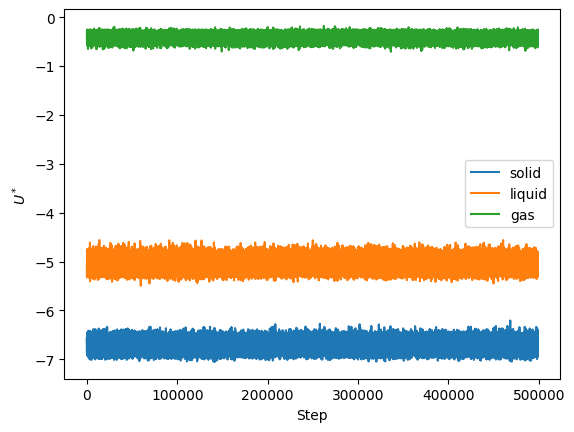

In [26]:
plt.plot(U_s[1000:], label = "solid")
plt.plot(U_l[1000:], label = "liquid") 
plt.plot(U_g[1000:], label = "gas")
plt.legend()
plt.xlabel("Step")
plt.ylabel(r"$U^*$")

Text(0, 0.5, 'Error')

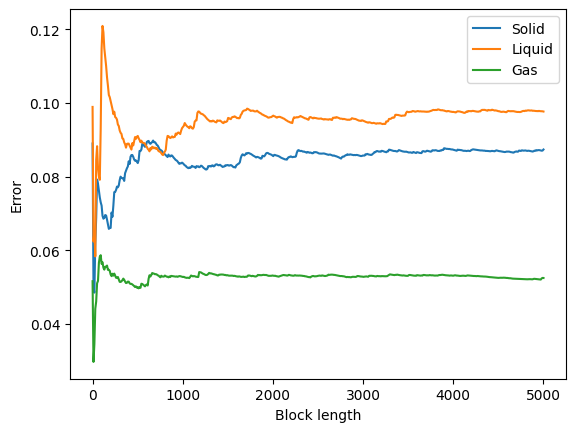

In [46]:
lunghezze= np.linspace(0, 5000, 500)

y=np.zeros(500)
for i in range(len(lunghezze)):
    y[i] = err_v_blk(U_s[1000:],int(lunghezze[i]))
plt.plot(lunghezze,y, label = "Solid")
for i in range(len(lunghezze)):
    y[i] = err_v_blk(U_l[1000:],int(lunghezze[i]))
plt.plot(lunghezze,y, label = "Liquid")
for i in range(len(lunghezze)):
    y[i] = err_v_blk(U_g[1000:],int(lunghezze[i]))
plt.plot(lunghezze,y, label = "Gas")
plt.legend()
plt.xlabel("Block length")
plt.ylabel("Error")


## Exercise 7.4

### Solid

We first compare the MC and MD results for the solid system

In [51]:
gdr_solid_MC = np.loadtxt("./Sims/NVT/Solid/output_gdr_50.dat")
gdr_solid_MD = np.loadtxt("./Sims/NVE/Solid/output_gdr_50.dat")

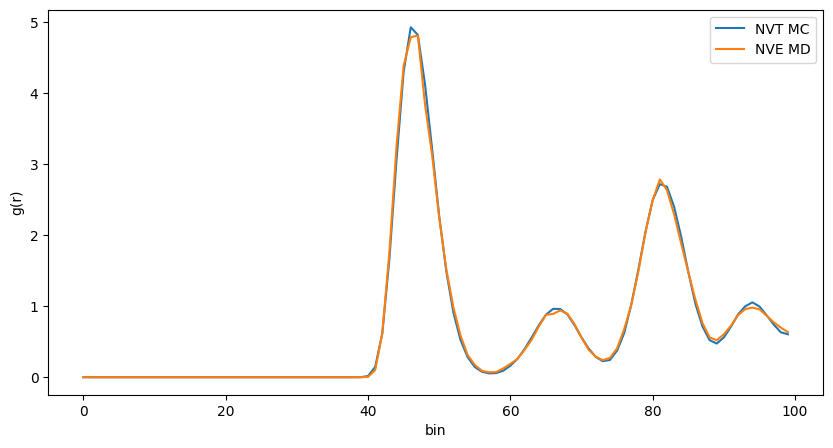

In [65]:
plt.figure(figsize = (10, 5))
plt.plot(gdr_solid_MC, label = "NVT MC")
plt.plot(gdr_solid_MD, label = "NVE MD")
plt.xlabel("bin")
plt.ylabel("g(r)")
plt.legend()

The graph shows a very close resemblance between the g(r) obtained from the NVE and the NVT simulation 

In [61]:
blck, Up_s_mc, Ub_s_mc, err_U_s_mc = np.loadtxt("./Sims/NVT/Solid/output_epot.dat", unpack = True)
blck, Ep_s_mc, Eb_s_mc, err_E_s_mc = np.loadtxt("./Sims/NVT/Solid/output_etot.dat", unpack = True)
blck, pres_s_mc, presb_s_mc, err_pres_s_mc = np.loadtxt("./Sims/NVT/Solid/output_press.dat", unpack = True)

Below three graphs show the block average of the potential energy, the total energy and the pressure. The kinetic energy and the temperature are not plotted as they are a constant in this type of simulation (Only the positions of the atoms changes)

Text(0.5, 0, 'Block')

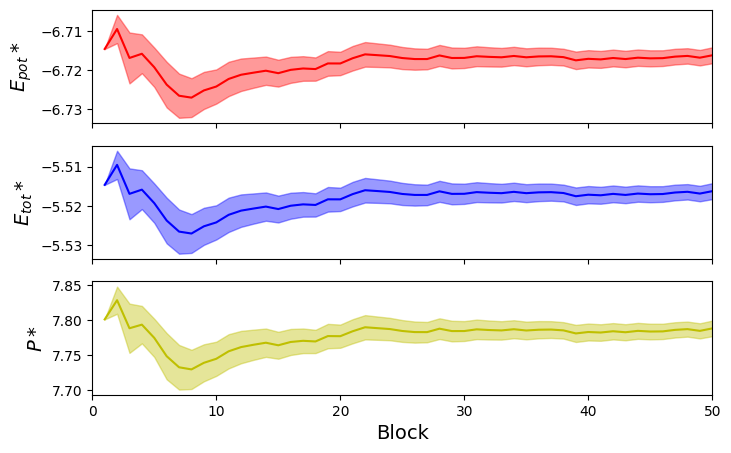

In [80]:
fig, axs = plt.subplots(3, sharex = True, figsize = (8, 5))
axs[0].plot(blck, Ub_s_mc, c = "r")
axs[0].fill_between(blck, Ub_s_mc-err_U_s_mc, Ub_s_mc+err_U_s_mc, alpha = 0.4, edgecolor ="r", facecolor = "r")
axs[0].set_xlim((0,50))
axs[0].set_ylabel(r"$E_{pot}*$", fontsize = 14)

axs[1].plot(blck, Eb_s_mc, c = "b")
axs[1].fill_between(blck, Eb_s_mc-err_E_s_mc, Eb_s_mc+err_E_s_mc, alpha = 0.4, edgecolor ="b", facecolor = "b")
axs[1].set_xlim((0,50))
axs[1].set_ylabel(r"$E_{tot}*$", fontsize = 14)

axs[2].plot(blck, presb_s_mc, c = "y")
axs[2].fill_between(blck, presb_s_mc-err_pres_s_mc, presb_s_mc+err_pres_s_mc, alpha = 0.4, edgecolor ="y", facecolor = "y")
axs[1].set_xlim((0,50))
axs[2].set_ylabel(r"$P*$", fontsize = 14)
axs[2].set_xlabel("Block", fontsize = 14)


### Liquid

In [74]:
gdr_liquid_MC = np.loadtxt("./Sims/NVT/Liquid/output_gdr_50.dat")
gdr_liquid_MD = np.loadtxt("./Sims/NVE/Liquid/output_gdr_50.dat")

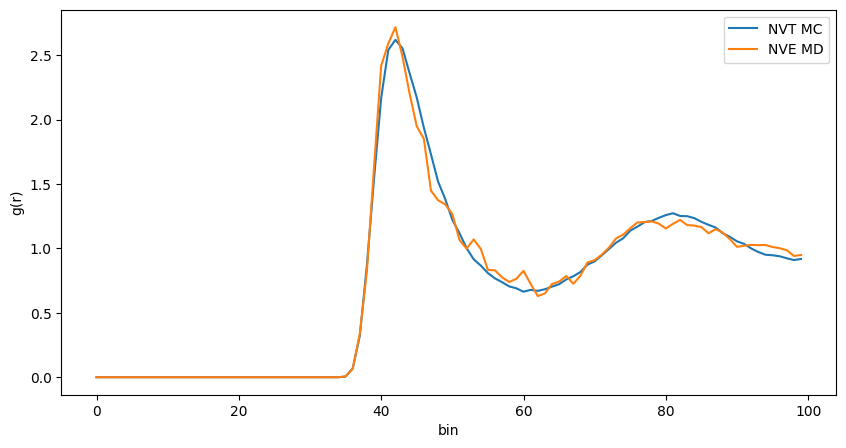

In [75]:
plt.figure(figsize = (10, 5))
plt.plot(gdr_liquid_MC, label = "NVT MC")
plt.plot(gdr_liquid_MD, label = "NVE MD")
plt.xlabel("bin")
plt.ylabel("g(r)")
plt.legend()

In [76]:
blck, Up_l_mc, Ub_l_mc, err_U_l_mc = np.loadtxt("./Sims/NVT/Liquid/output_epot.dat", unpack = True)
blck, Ep_l_mc, Eb_l_mc, err_E_l_mc = np.loadtxt("./Sims/NVT/Liquid/output_etot.dat", unpack = True)
blck, pres_l_mc, presb_l_mc, err_pres_l_mc = np.loadtxt("./Sims/NVT/Liquid/output_press.dat", unpack = True)

Text(0.5, 0, 'Block')

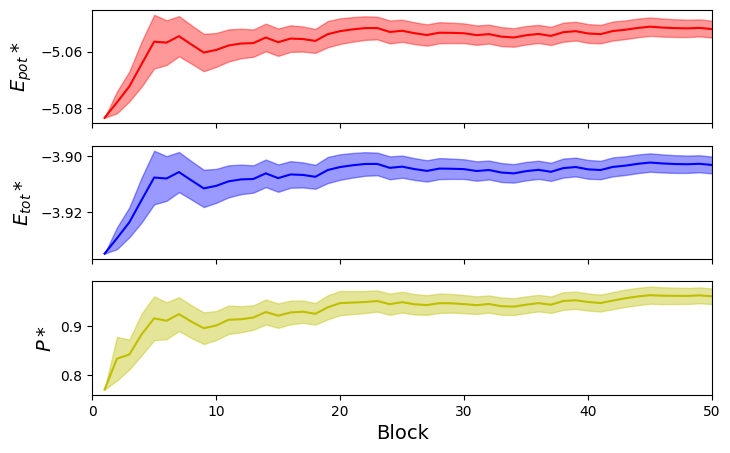

In [79]:
fig, axs = plt.subplots(3, sharex = True, figsize = (8, 5))
axs[0].plot(blck, Ub_l_mc, c = "r")
axs[0].fill_between(blck, Ub_l_mc-err_U_l_mc, Ub_l_mc+err_U_l_mc, alpha = 0.4, edgecolor ="r", facecolor = "r")
axs[0].set_xlim((0,50))
axs[0].set_ylabel(r"$E_{pot}*$", fontsize = 14)

axs[1].plot(blck, Eb_l_mc, c = "b")
axs[1].fill_between(blck, Eb_l_mc-err_E_l_mc, Eb_l_mc+err_E_l_mc, alpha = 0.4, edgecolor ="b", facecolor = "b")
axs[1].set_xlim((0,50))
axs[1].set_ylabel(r"$E_{tot}*$", fontsize = 14)

axs[2].plot(blck, presb_l_mc, c = "y")
axs[2].fill_between(blck, presb_l_mc-err_pres_l_mc, presb_l_mc+err_pres_l_mc, alpha = 0.4, edgecolor ="y", facecolor = "y")
axs[1].set_xlim((0,50))
axs[2].set_ylabel(r"$P*$", fontsize = 14)
axs[2].set_xlabel("Block", fontsize = 14)

### Gas

In [81]:
gdr_gas_MC = np.loadtxt("./Sims/NVT/Gas/output_gdr_50.dat")
gdr_gas_MD = np.loadtxt("./Sims/NVE/Gas/output_gdr_50.dat")

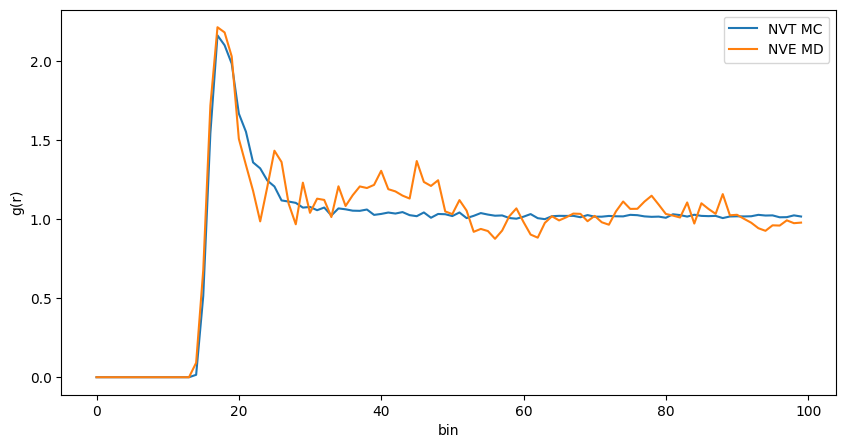

In [85]:
plt.figure(figsize = (10, 5))
plt.plot(gdr_gas_MC, label = "NVT MC")
plt.plot(gdr_gas_MD, label = "NVE MD")
plt.xlabel("bin")
plt.ylabel("g(r)")
plt.legend()

In [88]:
blck, Up_g_mc, Ub_g_mc, err_U_g_mc = np.loadtxt("./Sims/NVT/Gas/output_epot.dat", unpack = True)
blck, Ep_g_mc, Eb_g_mc, err_E_g_mc = np.loadtxt("./Sims/NVT/Gas/output_etot.dat", unpack = True)
blck, pres_g_mc, presb_g_mc, err_pres_g_mc = np.loadtxt("./Sims/NVT/Gas/output_press.dat", unpack = True)

Text(0.5, 0, 'Block')

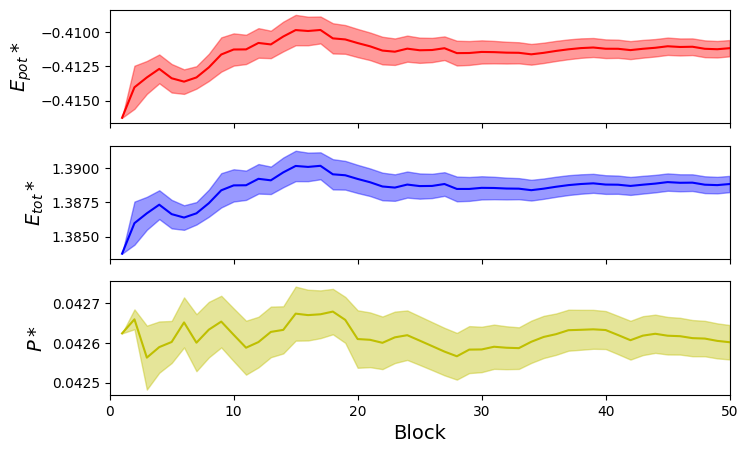

In [89]:
fig, axs = plt.subplots(3, sharex = True, figsize = (8, 5))
axs[0].plot(blck, Ub_g_mc, c = "r")
axs[0].fill_between(blck, Ub_g_mc-err_U_g_mc, Ub_g_mc+err_U_g_mc, alpha = 0.4, edgecolor ="r", facecolor = "r")
axs[0].set_xlim((0,50))
axs[0].set_ylabel(r"$E_{pot}*$", fontsize = 14)

axs[1].plot(blck, Eb_g_mc, c = "b")
axs[1].fill_between(blck, Eb_g_mc-err_E_g_mc, Eb_g_mc+err_E_g_mc, alpha = 0.4, edgecolor ="b", facecolor = "b")
axs[1].set_xlim((0,50))
axs[1].set_ylabel(r"$E_{tot}*$", fontsize = 14)

axs[2].plot(blck, presb_g_mc, c = "y")
axs[2].fill_between(blck, presb_g_mc-err_pres_g_mc, presb_g_mc+err_pres_g_mc, alpha = 0.4, edgecolor ="y", facecolor = "y")
axs[1].set_xlim((0,50))
axs[2].set_ylabel(r"$P*$", fontsize = 14)
axs[2].set_xlabel("Block", fontsize = 14)

### Side by side comparison

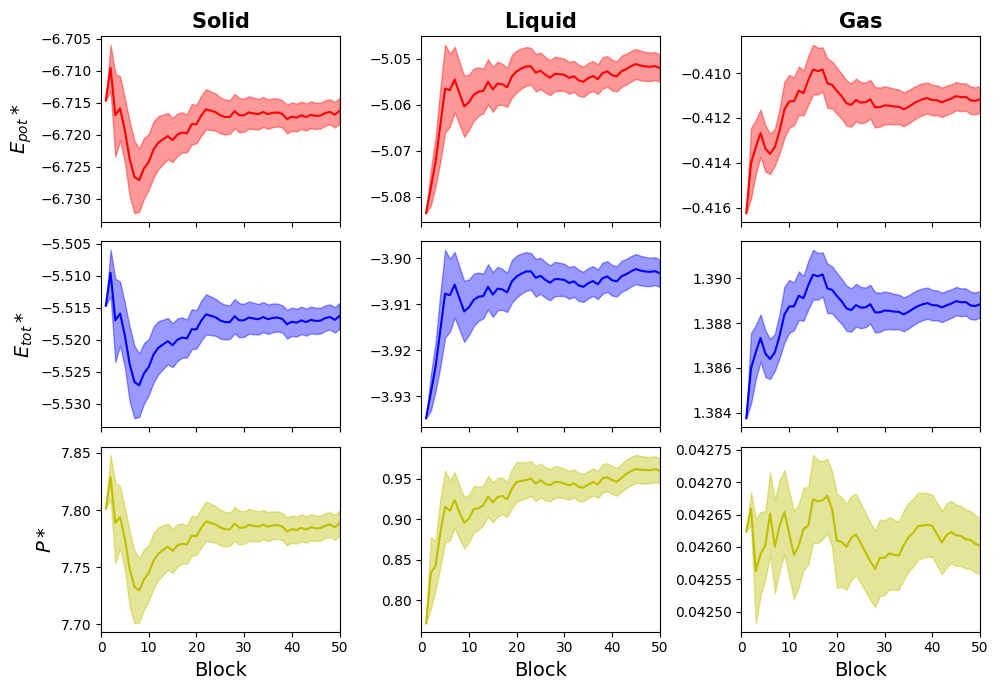

In [116]:
fig, axs = plt.subplots(3,3, sharex = True, figsize = (10, 7))
## Solid

axs[0,0].set_title(r"$\mathbf{Solid}$", fontsize = 15)
axs[0,1].set_title(r"$\mathbf{Liquid}$", fontsize = 15)
axs[0,2].set_title(r"$\mathbf{Gas}$", fontsize = 15)

axs[0,0].plot(blck, Ub_s_mc, c = "r")
axs[0,0].fill_between(blck, Ub_s_mc-err_U_s_mc, Ub_s_mc+err_U_s_mc, alpha = 0.4, edgecolor ="r", facecolor = "r")
axs[0,0].set_xlim((0,50))
axs[0,0].set_ylabel(r"$E_{pot}*$", fontsize = 14)

axs[1,0].plot(blck, Eb_s_mc, c = "b")
axs[1,0].fill_between(blck, Eb_s_mc-err_E_s_mc, Eb_s_mc+err_E_s_mc, alpha = 0.4, edgecolor ="b", facecolor = "b")
axs[1,0].set_xlim((0,50))
axs[1,0].set_ylabel(r"$E_{tot}*$", fontsize = 14)

axs[2,0].plot(blck, presb_s_mc, c = "y")
axs[2,0].fill_between(blck, presb_s_mc-err_pres_s_mc, presb_s_mc+err_pres_s_mc, alpha = 0.4, edgecolor ="y", facecolor = "y")
axs[1,0].set_xlim((0,50))
axs[2,0].set_ylabel(r"$P*$", fontsize = 14)
axs[2,0].set_xlabel("Block", fontsize = 14)

## Liquid


axs[0,1].plot(blck, Ub_l_mc, c = "r")
axs[0,1].fill_between(blck, Ub_l_mc-err_U_l_mc, Ub_l_mc+err_U_l_mc, alpha = 0.4, edgecolor ="r", facecolor = "r")
axs[0,1].set_xlim((0,50))

axs[1,1].plot(blck, Eb_l_mc, c = "b")
axs[1,1].fill_between(blck, Eb_l_mc-err_E_l_mc, Eb_l_mc+err_E_l_mc, alpha = 0.4, edgecolor ="b", facecolor = "b")
axs[1,1].set_xlim((0,50))

axs[2,1].plot(blck, presb_l_mc, c = "y")
axs[2,1].fill_between(blck, presb_l_mc-err_pres_l_mc, presb_l_mc+err_pres_l_mc, alpha = 0.4, edgecolor ="y", facecolor = "y")
axs[2,1].set_xlim((0,50))
axs[2,1].set_xlabel("Block", fontsize = 14)

## gas
axs[0,2].plot(blck, Ub_g_mc, c = "r")
axs[0,2].fill_between(blck, Ub_g_mc-err_U_g_mc, Ub_g_mc+err_U_g_mc, alpha = 0.4, edgecolor ="r", facecolor = "r")
axs[0,2].set_xlim((0,50))

axs[1,2].plot(blck, Eb_g_mc, c = "b")
axs[1,2].fill_between(blck, Eb_g_mc-err_E_g_mc, Eb_g_mc+err_E_g_mc, alpha = 0.4, edgecolor ="b", facecolor = "b")
axs[1,2].set_xlim((0,50))

axs[2,2].plot(blck, presb_g_mc, c = "y")
axs[2,2].fill_between(blck, presb_g_mc-err_pres_g_mc, presb_g_mc+err_pres_g_mc, alpha = 0.4, edgecolor ="y", facecolor = "y")
axs[1,2].set_xlim((0,50))
axs[2,2].set_xlabel("Block", fontsize = 14)


plt.tight_layout()
plt.savefig("compare.png", dpi = 300)

plt.show()


And at last a comparison in a single plot of the gdr computed from the monte carlo NVT and the molecular dynamics NVE simulations

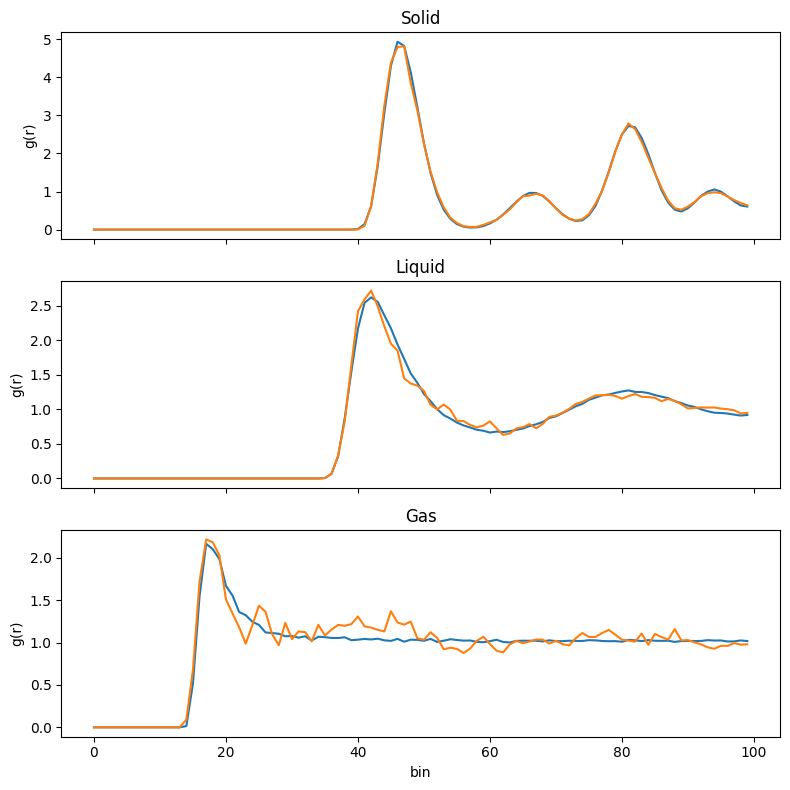

In [126]:
fig, axs = plt.subplots(3, sharex = True, figsize = (8, 8))
axs[0].set_title("Solid")
axs[0].plot(gdr_solid_MC)
axs[0].plot(gdr_solid_MD)
axs[0].set_ylabel("g(r)")

axs[1].set_title("Liquid")
axs[1].plot(gdr_liquid_MC)
axs[1].plot(gdr_liquid_MD)
axs[1].set_ylabel("g(r)")

axs[2].set_title("Gas")
axs[2].plot(gdr_gas_MC)
axs[2].plot(gdr_gas_MD)
axs[2].set_xlabel("bin")
axs[2].set_ylabel("g(r)")
plt.tight_layout()
plt.savefig("compare_gdr.png", dpi = 300)
plt.show()